In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('data.csv', delimiter = ',')

In [4]:
x = data[:,0]
y = data[:,1]

In [5]:
def distance(data,centroids):
    """calculate euclidean distance"""
    dist = np.sum((data[:, np.newaxis, :] - centroids)**2, axis=2)
    return dist

In [6]:
def kmeans(data, k):
    #randomly choose the first c
    first_center = np.random.choice(data.shape[0], k)
    centroids = data[first_center,:]
    newCentroids = data[first_center+1,:]
    i = 0
    
    while i < 1000:
        dist = distance(data, centroids)
        cluster_label = np.argmin(dist, axis=1)
        
        newCentroids = np.zeros(centroids.shape)
        
        for j in range(k):
            newCentroids[j] = np.mean(data[cluster_label == j, :], axis=0)
        
        if np.array_equal(centroids, newCentroids):
            break
        
        centroids = newCentroids
        i+=1
    
    total_dist = distance(data, centroids)
    
    return {"center" : centroids, "label" : cluster_label, "iteration" : i, "distance" : total_dist}

In [ ]:
def hac(data, n_cluster):
    #calculate the distance matrix
    d = distance(data, data)
    #make the entry in diagonal and below as infinity since it symmetric and don't care the distance with itself
    d[np.tril_indices_from(d)] = float('inf')
    #initinize the label
    unique_clu = np.arange(len(d))
    while np.unique(unique_clu).size > n_cluster:
        #find the location corresponding to least distance
        x1, x2 = np.where(d == np.min(d))
        #assign the entry label to the minimum label(arbitrarily)
        unique_clu[[x1[0],x2[0]]] = np.min(unique_clu[[x1[0],x2[0]]])
        #replace the distance with infinity (make sure not revisit)
        d[x1[0],x2[0]] = float('inf')
    return unique_clu

In [7]:
mean_vic = kmeans(data,2)['center']
t_vic = kmeans(data,2)['label']
unique_clu = hac(data, 2)

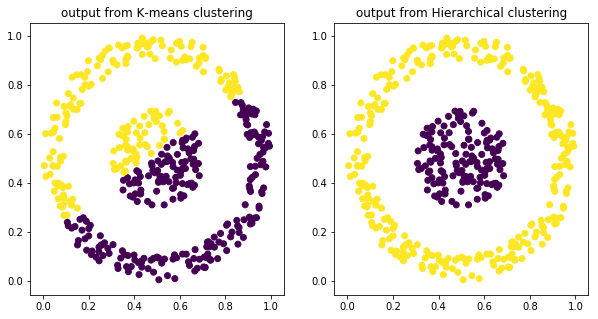

In [24]:
plt.figure(1,figsize=(10,5))
plt.subplot(121)
plt.scatter(x, y, c=t_vic)
plt.title("output from K-means clustering")
plt.subplot(122)
plt.scatter(x, y, c=unique_clu)
plt.title("output from Hierarchical clustering")
plt.show()